## Initialize session

In [150]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms
import matplotlib.pyplot as plt

data_dir="/data/nugrid_apod2"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## Get 3M$_{\odot}$ Model

In [151]:
star = ms.star_log(mass=3,Z=0.02)

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 3.0
Using old star.logsa file ...
 reading ...100% 

Closing star.log  tool ...


### Look at the L$_{H}$ and L$_{He}$ evolution

By looking at their luminosity evolution, it can be found where the hydrogen core burning stops and the helium core burning begins. This should be related to where it occurs in a Kippenhahn diagram and it should be before the thermal pulsing stages where there is convection between the H and He boundaries. 

<IPython.core.display.Javascript object>


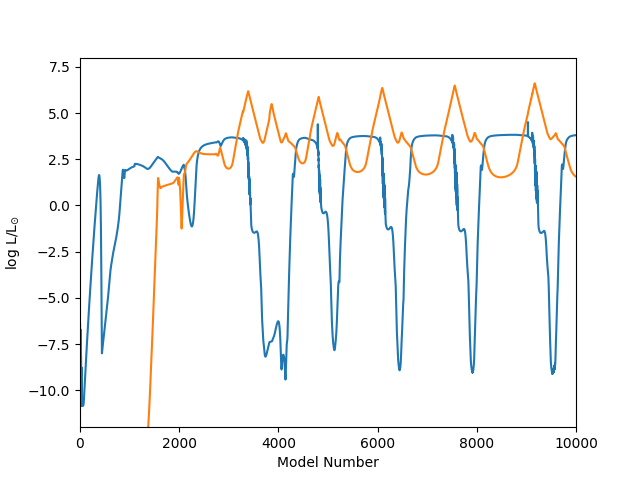

(0, 10000)

In [152]:
# get the L_H and L_He and model number
model = star.get('model_number')
radius = star.get('log_R')
LH = star.get('log_LH')
LHe = star.get('log_LHe')

# create figure
plt.figure(1)

# plot
plt.plot(model,LH,label=r"L$_{H}$")
plt.plot(model,LHe)

# labels
plt.xlabel('Model Number')
plt.ylabel('log L/L$_{\odot}$')

# limits
plt.ylim([-12,8])
plt.xlim([0,10000])

The helium burning starts around model number 1600 while the hydrogen burning on the main sequence starts around 850. These will be used to point what $\rho_{c}$ and T$_{c}$ are doing at these points. The first thermal pulse is at its peak at around 3400

### Find the Thermal Pulse $^{13}C$ Pocket

First look at the early thermal pulse structure for convection zones and look at the abundances that begin at that point

<IPython.core.display.Javascript object>


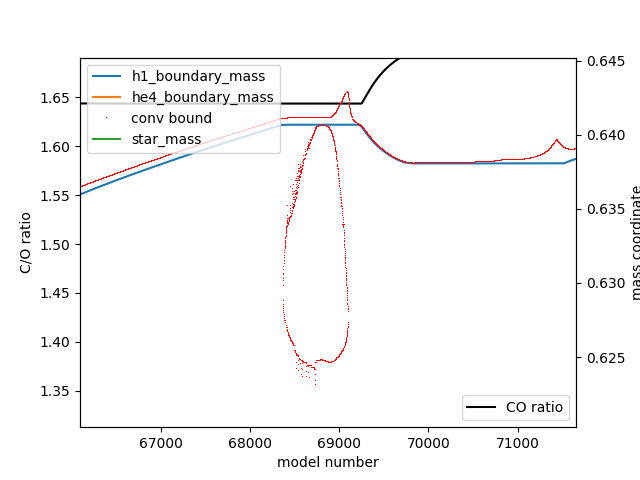

In [153]:
# Look at the convection structure around the first few thermal pulses
ifig=111;close(ifig);figure(ifig)
star.kippenhahn_CO(111,'model')

# model xlimits
lower_x = 3200
upper_x = 5200

# model ylimits
lower_y = 0.55
upper_y = 0.65

# set the limits
#xlim([lower_x,upper_x])
ylim([lower_y,upper_y])

# grab the xlim and ylim to use for other plots
axes = gca()
ylim1 = axes.get_ylim()
xlim1 = axes.get_xlim()

# set the abundance profile model number to be in the middle of a convection zone
abund_model = 4810

In [74]:
star.kip_cont?

<IPython.core.display.Javascript object>


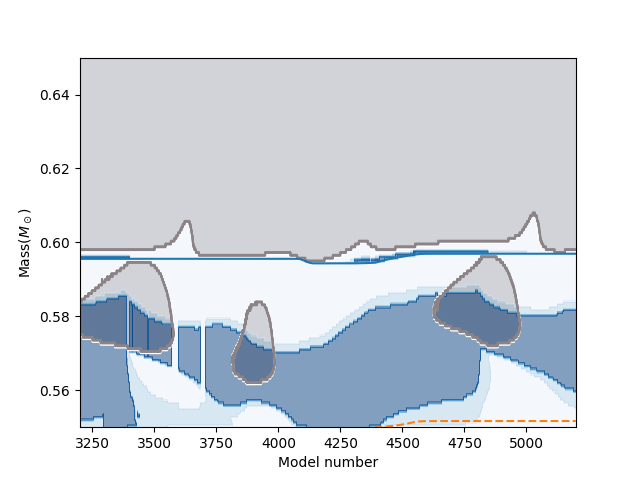

 creating color map1 ...100% 

 creating color map mix ...100% 

engenstyle was  twozone
mixstyle was  twozone

 finished preparing color map
plot versus model number
plotting contours
plotting patches
plotting abund boundaries


(0.55000000000000004, 0.65000000000000002)

In [75]:
# look at the 'new style' kippenhahn diagram to see energy generation
ifig = plt.figure(2)

# create plot
star.kip_cont(ifig=2,modstart=int(xlim1[0]),modstop=int(xlim1[1]),xres=4000,yres=4000)

# set ylim
ylim(ylim1)

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 3.0
Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools


<IPython.core.display.Javascript object>


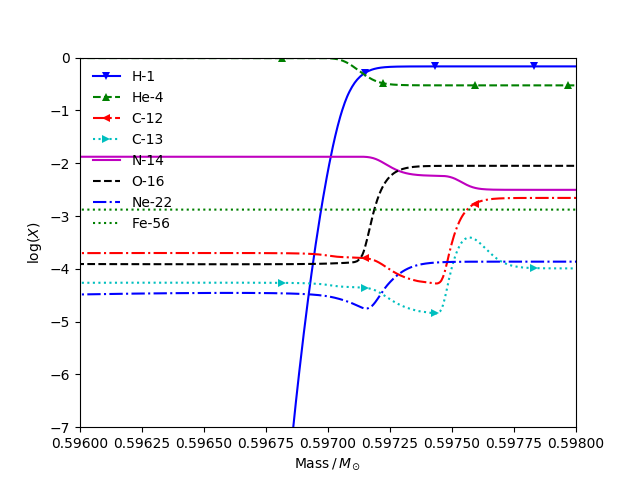

 reading ['iso_massf']...100%

(0.596, 0.598)

In [149]:
# look at the abundance profile of generic CNO and He burning species
species=['H-1','He-4','C-12','C-13','N-14','O-16','Ne-22','Fe-56']

# get the post processing model
star_post = mp.se(mass=3,Z=0.02)

# create the abundance plot
plt.figure(4)
star_post.abu_profile(isos=species,ifig=4,fname=abund_model,logy=True)

# set reasonable ylim
ylim(-7,0)

# set the mass range based on the convection area and where 13C is being made
xlim([0.596,0.598])

Where the H1 abundance rises sharply is the exiting of the H-free zone. There is then a build up of 13C and 12C in the radiative zone between the He convection zone and the H convective zone towards the surface. Over time this will keep adding 13C and 22Ne which will be able to produce significant flux of neutrons allowing the trans 56Fe s-process elements to form

### Late Stage Thermal Pulses and the s-process

<IPython.core.display.Javascript object>


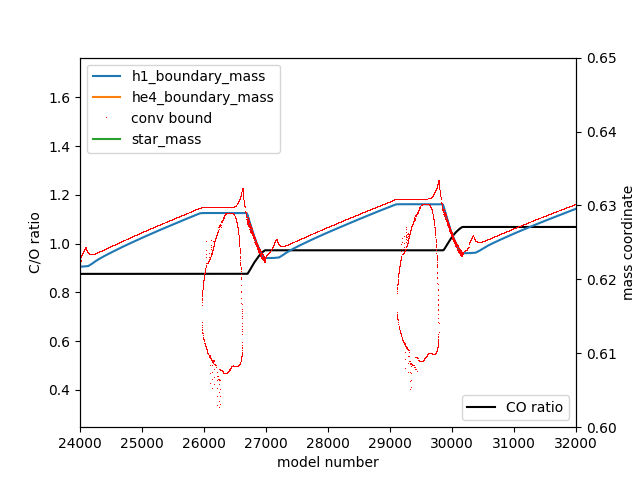

In [130]:
# create a kippenhahn diagram in the later stages
plt.figure(10)
star.kippenhahn_CO(10,'model')

# set the xlim and ylim
xlim([24000,32000])
ylim([0.6,0.65])

# grab the axes
axes = gca()

# just need the mass range for abundance plots
mass_range = axes.get_ylim()

# choose a model number thats in the middle of convection
model_abund1 = 28245
model_abund2 = 32000

There is a very small radiative zone inbetween the He and H convection zone. This is where the 13C forms and if it is hot enough in the star then the s-process can take place from the 13C($\alpha$,n)16O releasing a ton of neutrons which the iron will accept and go up the valley of stability. However, some of this 13C can be taken back towards the surface as the H convection zone extends deeper after the He convection has finished.

<IPython.core.display.Javascript object>


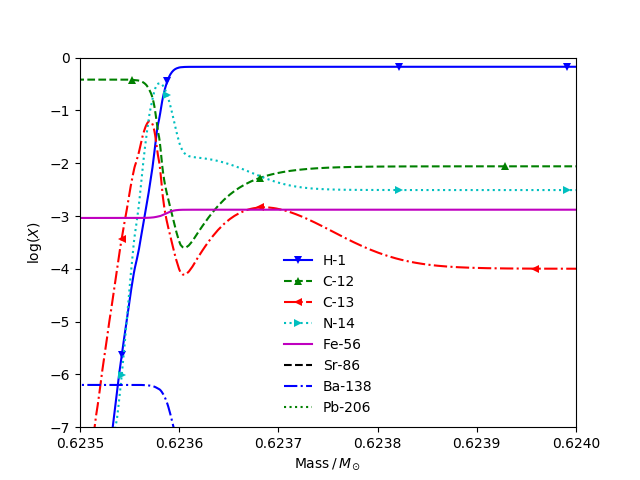

 reading ['iso_massf']...100%

(0.6235, 0.624)

In [148]:
# set the s-process species
s_species = ['H-1','C-12','C-13','N-14','Fe-56','Sr-86','Ba-138','Pb-206']

# create plot for a formation of 13C between the H1 boundary mass and the H convection zone
plt.figure(9)

# plot abundances
star_post.abu_profile(isos=s_species,ifig=9, fname=30300,logy=True)

# set ylim
ylim([-7,0])

# set xlim based on mass range after looking
xlim(0.62350,0.624) 

<IPython.core.display.Javascript object>


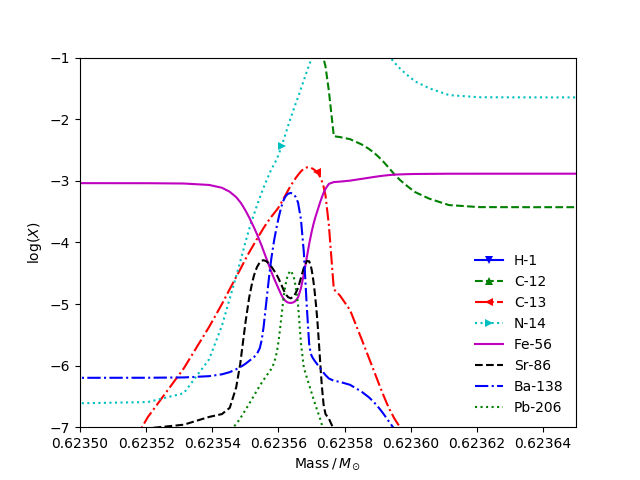

 reading ['iso_massf']...100%

(0.6235, 0.62365)

In [139]:
# set the s-process species
s_species = ['H-1','C-12','C-13','N-14','Fe-56','Sr-86','Ba-138','Pb-206']

# create plot for 'second' 13C pocket with s-process
plt.figure(7)

# plot abundances
star_post.abu_profile(isos=s_species,ifig=7, fname=model_abund2,logy=True)

# set ylim
ylim([-7,-1])

# set xlim based on mass range after looking
xlim([0.6235,0.623650])

<IPython.core.display.Javascript object>


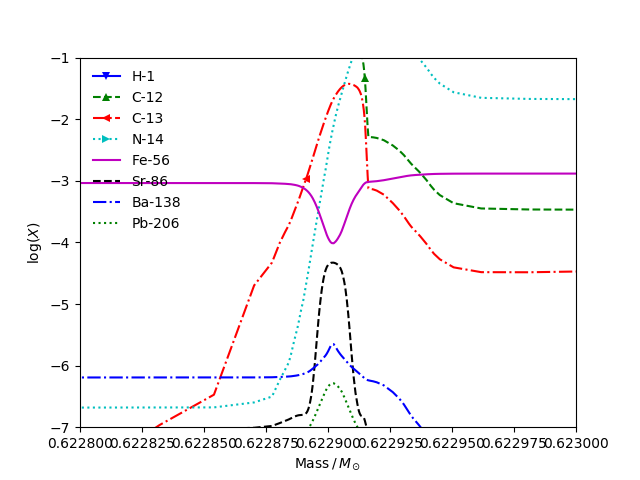

 reading ['iso_massf']...100%

(0.6228, 0.623)

In [132]:
# set the s-process species
s_species = ['H-1','C-12','C-13','N-14','Fe-56','Sr-86','Ba-138','Pb-206']

# create plot for 'second' 13C pocket with s-process
plt.figure(8)

# plot abundances
star_post.abu_profile(isos=s_species,ifig=8, fname=model_abund1,logy=True)

# set ylim
ylim([-7,-1])

# set xlim based on mass range after looking
xlim([0.6228,0.623])